In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
#import pandas_profiling
import datetime

## Load dataset sales

In [88]:
#sales_df.to_csv('sales.csv',index = False)
sales_df = pd.read_csv('sales.csv', delimiter=',')


In [89]:
sales_df.shape

(5484045, 4)

In [90]:
sales_df.to_csv('sales.csv',index = False)

In [91]:
sales_df.head(7)

,CustomerId,SaleDate,Product,SaleValue
0,242032,2021-05-19,AMACIANTE DE ROUPA,39.59
1,26627,2021-05-19,COLORACAO/MODIFICADOR,129.48
2,1638700,2021-05-19,SABONETE,201.60
3,3288645,2021-05-21,OLEO E AZEITE,623.40
4,3976452,2021-05-21,SABONETE,39.82
5,306534,2021-05-27,PAPEL TOALHA/GUARDANAPO,389.90
6,3288645,2021-05-21,MAIONESE,71.73


In [92]:
import datetime as dt

#data_atual = datetime.date.today()
current_date = dt.datetime(2021, 6, 16)
print(sales_df['SaleDate'].min()), print(sales_df['SaleDate'].max())
print(current_date)



2021-05-16
2021-06-16
2021-06-16 00:00:00


In [93]:
recency_df = sales_df.groupby(['CustomerId']).SaleDate.max().reset_index()
recency_df['SaleDate'] = pd.to_datetime(recency_df['SaleDate'])
recency_df.columns = ['CustomerId','LastSaleDate']
recency_df['Recency'] = recency_df['LastSaleDate'].apply(lambda x: (current_date - x).days)
recency_df = recency_df[['CustomerId', 'Recency']]
recency_df.head()


,CustomerId,Recency
0,11,7
1,18,2
2,38,6
3,42,6
4,45,1


In [95]:
sales_df.shape

(5484045, 4)

In [96]:
sales_df = pd.merge(sales_df, recency_df, how = 'inner', on = 'CustomerId')

In [97]:
sales_df.shape

(5484045, 5)

In [98]:
freq_df = sales_df.groupby(['CustomerId'])['SaleDate'].count().reset_index()
freq_df.columns =['CustomerId', 'Frequency']
freq_df.head()

,CustomerId,Frequency
0,11,40
1,18,49
2,38,23
3,42,35
4,45,49


In [99]:
sales_df = pd.merge(sales_df, freq_df, how = 'inner', on = 'CustomerId')

In [100]:
sales_df.shape

(5484045, 6)

In [101]:
variety_df = sales_df.groupby(['CustomerId'])['Product'].nunique().reset_index()
variety_df.columns = ['CustomerId', 'Variety']
variety_df.head()

,CustomerId,Variety
0,11,5
1,18,12
2,38,2
3,42,4
4,45,3


In [102]:
sales_df = pd.merge(sales_df, variety_df, how = 'inner', on = 'CustomerId')

In [103]:
sales_df.shape

(5484045, 7)

In [104]:
rev_df = sales_df.groupby(['CustomerId'])['SaleValue'].sum().reset_index()
rev_df.columns = ['CustomerId', 'Revenue']
rev_df.head()


,CustomerId,Revenue
0,11,2411.76
1,18,2877.98
2,38,7900.62
3,42,7580.53
4,45,4493.42


In [105]:
sales_df = pd.merge(sales_df, rev_df, how = 'inner', on = 'CustomerId')

In [106]:
sales_df.shape

(5484045, 8)

In [107]:
sales_res_df = sales_df.groupby(['CustomerId'])[['SaleValue']].sum().reset_index()
sales_res_df.columns = ['CustomerId', 'Revenue']


In [108]:
sales_res_df.shape

(125971, 2)

In [109]:
sales_res_df = pd.merge(sales_res_df, recency_df, how = 'inner', on = 'CustomerId')
sales_res_df = pd.merge(sales_res_df, freq_df, how = 'inner', on = 'CustomerId')
sales_res_df = pd.merge(sales_res_df, variety_df, how = 'inner', on = 'CustomerId')


In [110]:
sales_res_df.shape

(125971, 5)

In [111]:
sales_res_df.head()

,CustomerId,Revenue,Recency,Frequency,Variety
0,11,2411.76,7,40,5
1,18,2877.98,2,49,12
2,38,7900.62,6,23,2
3,42,7580.53,6,35,4
4,45,4493.42,1,49,3


In [115]:
sales_res_df = pd.merge(sales_res_df, clientes_df, how='inner', on = 'CustomerId') 

In [116]:
sales_res_df.shape

(5776, 5)

### Behavioral Segments 

In [117]:
sales_res_df.shape

(5776, 5)

In [118]:
sales_res_df = sales_res_df[sales_res_df['Recency'] > 0]

In [119]:
sales_res_df.shape

(5325, 5)

In [120]:
sales_res_df = sales_res_df[sales_res_df['Revenue'] > 0]

In [121]:
sales_res_df.shape

(5323, 5)

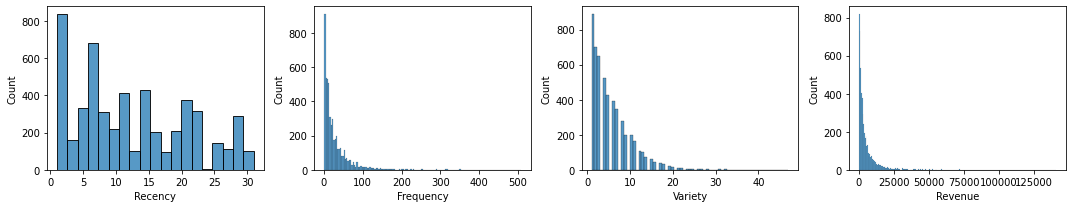

In [122]:
fig, ax = plt.subplots(1, 4, figsize=(15,3))
sns.histplot(sales_res_df['Recency'], ax=ax[0])
sns.histplot(sales_res_df['Frequency'], ax=ax[1])
sns.histplot(sales_res_df['Variety'], ax=ax[2])
sns.histplot(sales_res_df['Revenue'], ax=ax[3])
plt.tight_layout()
plt.show()

### Acertando assimetria e scaling

In [123]:
from scipy import stats
def desc_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(sales_res_df[x], ax=ax[0,0])
    sns.histplot(np.log(sales_res_df[x]), ax=ax[0,1])
    sns.histplot(np.sqrt(sales_res_df[x]), ax=ax[1,0])
    sns.histplot(stats.boxcox(sales_res_df[x])[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(sales_res_df[x].skew().round(2))
    print(np.log(sales_res_df[x]).skew().round(2))
    print(np.sqrt(sales_res_df[x]).skew().round(2))
    print(pd.Series(stats.boxcox(sales_res_df[x])[0]).skew().round(2))

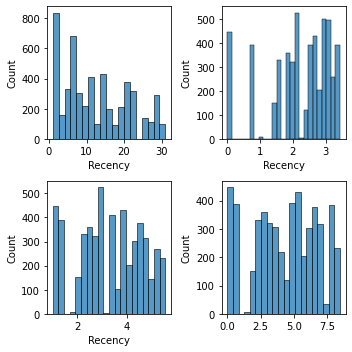

0.43
-0.86
-0.12
-0.17


In [124]:
desc_skewness('Recency')

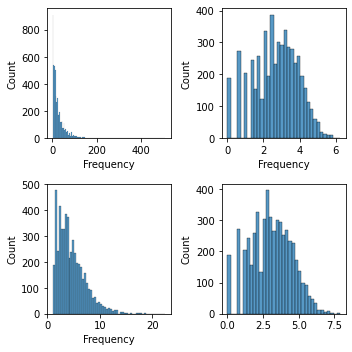

3.58
-0.22
1.3
-0.01


In [125]:
desc_skewness('Frequency')

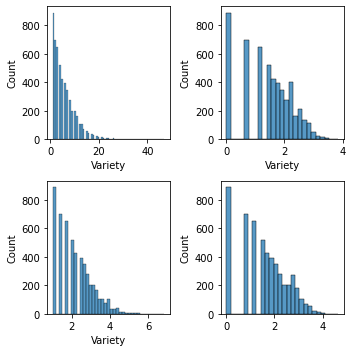

1.68
-0.16
0.63
-0.02


In [126]:
desc_skewness('Variety')

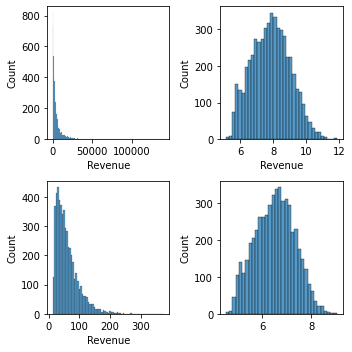

5.66
0.13
1.86
0.01


In [127]:
desc_skewness('Revenue')

In [128]:
from scipy import stats


sales_res_fix_df = pd.DataFrame()
sales_res_fix_df["Recency"] = stats.boxcox(sales_res_df['Recency'])[0]
sales_res_fix_df["Frequency"] = stats.boxcox(sales_res_df['Frequency'])[0]
sales_res_fix_df["Variety"] = stats.boxcox(sales_res_df['Variety'])[0]
sales_res_fix_df["Revenue"] = stats.boxcox(sales_res_df['Revenue'])[0]
sales_res_fix_df.tail()

,Recency,Frequency,Variety,Revenue
5318,8.307479,1.914572,1.158072,4.930756
5319,0.000000,2.995112,1.739176,5.463752
5320,3.823798,5.021768,1.953515,6.479995
5321,2.394941,4.329952,1.953515,7.964072
5322,6.902799,2.725255,0.716510,6.699022


### Normalizando os dados

In [129]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(sales_res_fix_df)
sales_res_norm_df = scaler.transform(sales_res_fix_df)
print(sales_res_norm_df.mean(axis = 0).round(2))
print(sales_res_norm_df.std(axis = 0).round(2))

[-0.  0.  0. -0.]
[1. 1. 1. 1.]


## Modelo (K-Means)

In [130]:
import plotly.express as px
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sales_res_norm_df)
    sse[k] = kmeans.inertia_ # SSE for nearest cluster centroid 

sse_df = pd.DataFrame(sse.items())
    
fig = px.line(sse_df, x=list(sse.keys()), y=list(sse.values()), markers=True,

              labels={
                  "x": "K",
                  "y": "SSE"
              },
              title="Elbow Method")
fig.show()
    
    

In [131]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(sales_res_norm_df)
model.labels_.shape

(5323,)

In [132]:
model.labels_

array([1, 1, 3, ..., 1, 1, 0], dtype=int32)

In [133]:
sales_res_df["Classification"] = model.labels_
sales_res_df["Classification"] = sales_res_df['Classification'].astype(str).apply(lambda x: x.replace('0','B')).apply(lambda x: x.replace('1','D')).apply(lambda x: x.replace('2','A')).apply(lambda x: x.replace('3','C'))
sales_res_df.groupby('Classification').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Variety':'mean',
    'Revenue':'mean'}).round(1)


,Recency,Frequency,Variety,Revenue
Classification,,,,
A,21.4,4.3,1.9,1130.3
B,18.2,18.5,6.2,2119.3
C,6.5,15.6,2.7,5618.2
D,5.7,66.5,10.4,10092.0


In [134]:
df_normalized = pd.DataFrame(sales_res_norm_df, columns=['Recency', 'Frequency', 'Variety', 'Revenue'])
df_normalized['ID'] = sales_res_df.index
df_normalized['Classification'] = model.labels_
df_normalized['Classification'] = df_normalized['Classification'].astype(str).apply(lambda x: x.replace('0','C')).apply(lambda x: x.replace('1','A')).apply(lambda x: x.replace('2','D')).apply(lambda x: x.replace('3','B'))
df_normalized.head()

,Recency,Frequency,Variety,Revenue,ID,Classification
0,-0.467770,0.801633,0.223246,-0.025603,0,A
1,-1.432191,0.907801,-0.040473,0.500713,2,A
2,0.043147,0.105513,-0.824853,1.718530,3,B
3,-1.432191,1.530096,1.313705,0.660752,4,A
4,-0.784142,0.707436,-0.372310,0.109163,5,B


In [85]:
df_nor_melt = pd.melt(df_normalized.reset_index(),
                      id_vars=['ID', 'Classification'],
                      value_vars=['Recency','Frequency', 'Variety', 'Revenue'],
                      var_name='Metrics',
                      value_name='Values')
df_nor_melt.head()

,ID,Classification,Metrics,Values
0,0,A,Recency,-0.467770
1,2,A,Recency,-1.432191
2,3,B,Recency,0.043147
3,4,A,Recency,-1.432191
4,5,B,Recency,-0.784142


/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



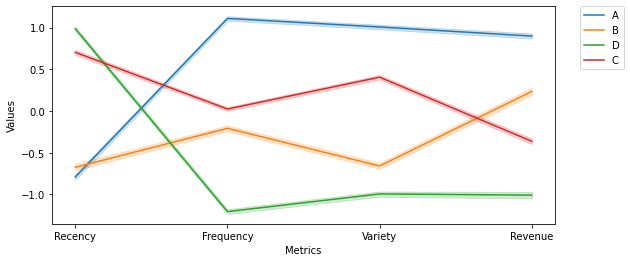

In [86]:
plt.figure(figsize=(9, 4))
sns.lineplot('Metrics', 'Values', hue='Classification', data=df_nor_melt)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)